In [1]:
import pandas as pd
df=pd.read_csv('dataa.csv')
df.head()

,age,gender,marriage,children,family,education,income,car,income_type,house,work_days,registraion_time,document_change,jobtitle,amount,rate,period,time,social_stability,social_exposure,social_quality,sentiment,defaulter
0,24,female,divorced,have,5,Junior school,500000,yes,1,own,6,30,10,software engineer,2000000,15.0,30,1,3.0,2,1,0,1
1,33,female,married,don't have,3,masters,600000,yes,3,own,6,20,10,executive chef,3000000,12.0,35,10,9.0,3,0,0,0
2,34,male,married,don't have,3,bachelors,2000000,yes,4,own,5,20,15,business,2000000,12.0,35,9,7.0,2,0,1,0
3,44,male,unmarried,don't have,3,Junior school,3500000,no,1,own,6,30,10,executive chef,6000000,12.5,30,12,15.0,4,0,1,0
4,41,male,unmarried,have,4,masters,2000000,no,6,own,3,30,15,manager,30000000,12.0,30,1,2.0,3,1,0,1


In [2]:
df['marriage'].value_counts()

df.replace({"married": 0, "unmarried": 1, "divorced": 2,}, inplace = True)

df['gender'].value_counts()

df.replace({"male": 0, "female": 1}, inplace = True)

df['children'].value_counts()
df.replace({"have": 0, "don't have": 1}, inplace = True)

df['education'].value_counts()
df.replace({"Junior school": 0, "masters": 1, "bachelors": 2}, inplace = True)

df['car'].value_counts()
df.replace({"no": 0, "yes": 1}, inplace = True)

df['house'].value_counts()
df.replace({"own": 0, "rent": 1, "parent's house": 2}, inplace = True)

df['jobtitle'].value_counts()
Jobtitle = pd.get_dummies(df["jobtitle"], drop_first= True)

In [3]:
df = pd.concat([df, Jobtitle], axis = 1)
df.drop(["jobtitle"], axis = 1, inplace = True)

In [4]:
df

,age,gender,marriage,children,family,education,income,car,income_type,house,work_days,registraion_time,document_change,amount,rate,period,time,social_stability,social_exposure,social_quality,sentiment,defaulter,business,data analyst,executive chef,manager,software engineer
0,24,1,2,0,5,0,500000,1,1,0,6,30,10,2000000,15.0,30,1,3.0,2,1,0,1,0,0,0,0,1
1,33,1,0,1,3,1,600000,1,3,0,6,20,10,3000000,12.0,35,10,9.0,3,0,0,0,0,0,1,0,0
2,34,0,0,1,3,2,2000000,1,4,0,5,20,15,2000000,12.0,35,9,7.0,2,0,1,0,1,0,0,0,0
3,44,0,1,1,3,0,3500000,0,1,0,6,30,10,6000000,12.5,30,12,15.0,4,0,1,0,0,0,1,0,0
4,41,0,1,0,4,1,2000000,0,6,0,3,30,15,30000000,12.0,30,1,2.0,3,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,43,0,1,1,3,1,800000,1,1,1,5,30,10,50000000,13.0,18,11,6.0,4,0,0,0,0,1,0,0,0
996,50,0,0,0,3,2,2500000,0,3,1,3,20,20,30000000,12.5,25,12,8.0,2,1,1,0,1,0,0,0,0
997,21,1,0,0,2,1,600000,1,6,2,6,30,10,30000000,12.0,35,10,1.0,3,1,0,1,0,1,0,0,0
998,43,1,0,1,4,1,800000,0,4,0,3,30,20,2000000,18.0,15,12,12.0,4,2,1,0,0,0,0,1,0


In [5]:
df.columns

Index(['age', 'gender', 'marriage', 'children', 'family ', 'education',
       'income', 'car', 'income_type', 'house', 'work_days',
       'registraion_time', 'document_change', 'amount ', 'rate ', 'period',
       'time', 'social_stability', 'social_exposure', 'social_quality',
       'sentiment', 'defaulter', 'business', 'data analyst', 'executive chef',
       'manager', 'software engineer'],
      dtype='object')

In [6]:
X = df.loc[:,['age', 'gender', 'marriage', 'children', 'family ', 'education',
       'income', 'car', 'income_type', 'house', 'work_days',
       'registraion_time', 'document_change', 'amount ', 'rate ', 'period',
       'time', 'social_stability', 'social_exposure', 'social_quality',
       'sentiment', 'business', 'data analyst', 'executive chef',
       'manager', 'software engineer']]

In [7]:
y = df.loc[:,'defaulter']
y

0      1
1      0
2      0
3      0
4      1
      ..
995    0
996    0
997    1
998    0
999    0
Name: defaulter, Length: 1000, dtype: int64

In [8]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [9]:
ordered_rank_features=SelectKBest(score_func=chi2,k=20)
ordered_feature=ordered_rank_features.fit(X,y)

In [10]:
dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(X.columns)

In [11]:
features_rank=pd.concat([dfcolumns,dfscores],axis=1)


In [12]:
features_rank.columns=['Features','Score']
features_rank

,Features,Score
0,age,8.065524e-01
1,gender,3.555342e+00
2,marriage,5.207077e-01
3,children,3.225922e-01
4,family,1.308569e-03
5,education,1.480740e+00
6,income,1.953355e+06
7,car,4.507088e-01
8,income_type,6.066168e-03
9,house,2.168953e-01


In [13]:
features_rank.nlargest(10,'Score')

,Features,Score
13,amount,3.300613e+06
6,income,1.953355e+06
17,social_stability,2.450671e+03
19,social_quality,3.054879e+02
20,sentiment,2.704793e+02
23,executive chef,4.016983e+00
18,social_exposure,3.891409e+00
1,gender,3.555342e+00
11,registraion_time,2.651817e+00
24,manager,1.762078e+00


In [14]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [15]:
print(model.feature_importances_)

[0.00472914 0.00423458 0.00430921 0.00358839 0.0050766  0.00377872
 0.00564213 0.00364856 0.00490449 0.00481627 0.00571205 0.00324997
 0.00428707 0.0048617  0.00408428 0.00443091 0.00520168 0.2402355
 0.02341452 0.25772191 0.39095627 0.00221519 0.00187922 0.00274401
 0.00214359 0.00213404]


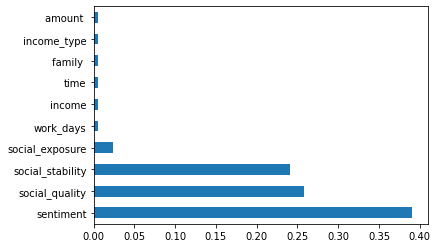

In [16]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

In [17]:
df.corr()

,age,gender,marriage,children,family,education,income,car,income_type,house,work_days,registraion_time,document_change,amount,rate,period,time,social_stability,social_exposure,social_quality,sentiment,defaulter,business,data analyst,executive chef,manager,software engineer
age,1.000000,-0.023586,0.010846,-0.043610,-0.007893,-0.004915,0.007155,0.009027,-0.004881,-0.002724,-0.014702,-0.019245,-0.010316,0.037991,-0.028274,0.003281,0.022187,-0.012030,-0.035012,0.015895,-0.027046,0.019251,0.004284,0.020543,0.023318,-0.034412,-0.010352
gender,-0.023586,1.000000,0.062736,0.005555,-0.008764,-0.019077,0.004601,0.024030,0.021445,0.045760,0.006773,-0.017780,0.040690,-0.062799,0.024996,0.002056,0.008431,-0.060289,-0.009274,0.098023,-0.043759,0.083741,-0.040051,-0.007248,-0.018025,-0.010004,0.030954
marriage,0.010846,0.062736,1.000000,0.011457,0.077872,-0.009753,-0.010156,-0.068168,0.051739,0.000145,0.040437,-0.009919,0.028163,0.006640,-0.011970,0.003281,-0.012424,-0.004199,-0.046738,-0.005923,0.004564,0.026711,-0.049081,0.007826,-0.001856,-0.021415,0.032891
children,-0.043610,0.005555,0.011457,1.000000,0.015251,-0.052723,-0.009519,-0.101988,0.023213,0.040488,-0.003284,0.016523,0.016972,-0.033958,0.010480,0.027661,-0.002403,0.031156,0.005991,-0.018316,0.014586,-0.025004,0.020288,-0.031591,-0.010027,-0.023649,0.038621
family,-0.007893,-0.008764,0.077872,0.015251,1.000000,-0.091218,-0.014658,-0.011390,-0.007009,-0.016794,-0.073081,-0.032603,0.017018,-0.006237,0.057357,0.084143,0.017192,0.045322,0.047558,-0.027096,0.001684,0.001409,-0.056152,0.085171,0.010190,-0.026443,-0.015740
education,-0.004915,-0.019077,-0.009753,-0.052723,-0.091218,1.000000,-0.037433,-0.024560,-0.072361,0.002376,0.017753,-0.000588,0.044929,-0.002147,-0.036101,-0.015994,-0.047165,-0.050301,-0.014315,0.003447,-0.064338,0.047815,-0.007806,-0.039417,0.023255,0.036637,0.018400
income,0.007155,0.004601,-0.010156,-0.009519,-0.014658,-0.037433,1.000000,-0.014213,-0.047460,-0.019003,-0.016708,-0.000765,0.042979,-0.036874,0.007633,-0.015358,0.030513,0.058776,-0.052141,-0.016001,0.055934,-0.044926,0.043161,-0.055906,-0.004611,-0.033867,0.022490
car,0.009027,0.024030,-0.068168,-0.101988,-0.011390,-0.024560,-0.014213,1.000000,-0.009847,-0.014508,0.036168,-0.050039,0.020634,0.040474,0.047550,-0.002605,-0.050834,-0.073183,-0.024953,-0.017714,-0.032041,0.030054,-0.011310,0.039523,0.044911,-0.054900,0.001928
income_type,-0.004881,0.021445,0.051739,0.023213,-0.007009,-0.072361,-0.047460,-0.009847,1.000000,-0.027368,-0.056674,-0.000019,-0.043416,0.005921,0.071222,-0.016506,-0.003023,-0.004501,-0.020572,0.001864,0.019092,-0.002669,-0.050074,-0.012216,-0.015336,0.035458,0.064658
house,-0.002724,0.045760,0.000145,0.040488,-0.016794,0.002376,-0.019003,-0.014508,-0.027368,1.000000,0.079422,-0.009317,0.020063,-0.048963,0.018326,0.008415,0.034048,-0.019996,0.030828,0.015236,-0.033534,0.017685,0.077464,0.017321,-0.038236,-0.015463,0.017050


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


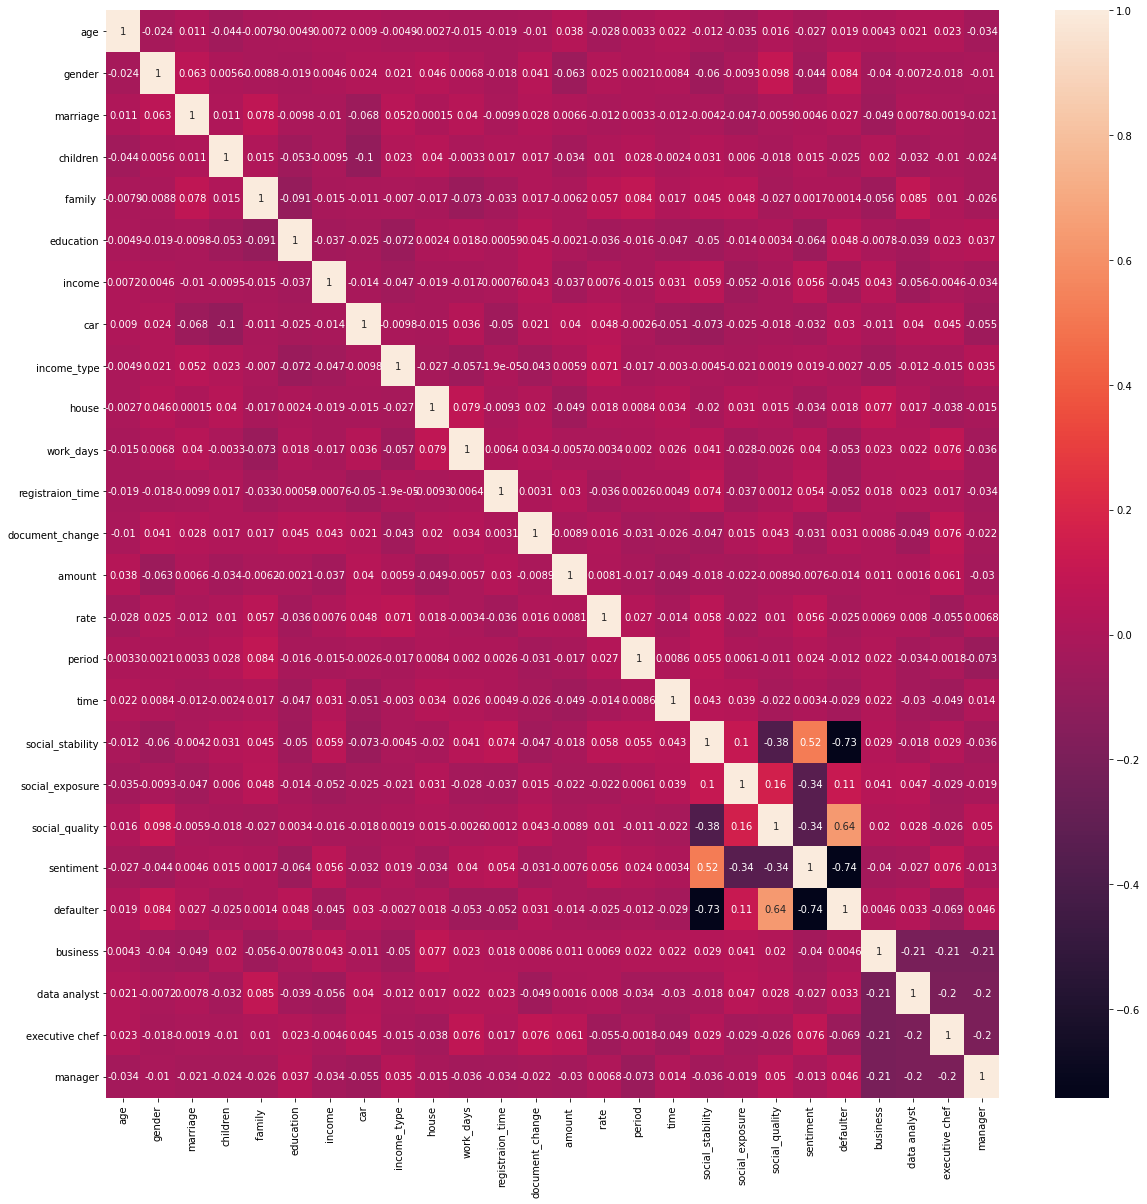

In [18]:
import seaborn as sns
corr=df.iloc[:,:-1].corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_features].corr(),annot=True)

In [19]:
# choosing only the best 10 features affecting the output
X = df.loc[:,['age', 'family ', 
       'income',  'work_days',
        'amount ', 'period',
        'social_stability', 'social_exposure', 'social_quality',
       'sentiment']]
y = df.loc[:,'defaulter']

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
from sklearn.ensemble import RandomForestClassifier
reg_rf=RandomForestClassifier()
reg_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
y_pred=reg_rf.predict(X_test)

In [23]:
y_pred

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0])

In [24]:
new_input = [[24,5,500000,6,2000000,30,3,2,1,0]]
new_output = reg_rf.predict(new_input)

In [25]:
new_output

array([1])

In [26]:
new_input = [[44,3,3500000,6,6000000,30,15,4,0,1]]
new_output = reg_rf.predict(new_input)

In [27]:
new_output

array([0])